<a href="https://colab.research.google.com/github/navalpatel384/MyFirstPullRequest/blob/master/EDACheckpointGroup032-Wi22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COGS 108 - Data Checkpoint

# Names

Naval Patel

*   Naval Patel
*   Ray Zhou
*   Nathaniel Satriya
*   Yoomin Oh
*   Jennifer Nunez


<a id='research_question'></a>
# Research Question

Is there a correlation between population density (people per square mile) and depression per capita and square mile in the State of California between the years 2000-2020?



# Dataset(s)

*Fill in your dataset information here*

(Copy this information for each dataset)
- Dataset Name:
- Link to the dataset:
- Number of observations:

1-2 sentences describing each dataset. 

If you plan to use multiple datasets, add 1-2 sentences about how you plan to combine these datasets.
______________________________________________________
1. Dataset name: Historical Population Density Data (1910-2020)

*   Link: https://www.census.gov/data/tables/time-series/dec/density-data-text.html
*   Number of Observations:
*  This data provides the changing resident populations of each state in the US over 12 decades and ranks them based on their population density. Density is measured as the average population per square mile. According to the US Census Bureau, density levels have been higher across the Eastern sea and pacific coastline and lower in most of the West.


2. Dataset name: County Population Totals: 2010-2019 (California) 
*   Link: https://www.census.gov/data/datasets/time-series/demo/popest/2010s-counties-total.html
*   Number of Observations: 
* This provides the annual population estimates for each county in California from 2010 to 2019.


3. Dataset name: California Individuals by mental health diagnosis, gender, age, race, ethnicity and veteran status: Number, 2014-2019
*  Link:https://www.samhsa.gov/data/sites/default/files/reports/rpt35253/MHCLD-2019-R-FINAL.pdf
*   Number of Observations:
* This table was pulled from the 2019 Mental Health Client-Level Data (MH-CLD) Annual Report by SAMHSA, the agency within the U.S Department of Health and Human Services. Specifically, it provides information reported from state administrative data systems on: mental health diagnoses, mental health treatment settings, and demographic and substance use characteristics of individuals in mental health treatment facillities. Since our state of interest is California we pulled a relevant table from this report.

4. Dataset name: Diagnosed Depression (Ever) in LA county
* Link: http://publichealth.lacounty.gov/ha/HA_DATA_TRENDS.htm
* Number of Observations:
* This dataset provides estimates of depression diagnoses in health districts part of Los Angeles county jurisdiction, from 1999 to 2018. It contains other information about race, ethnicity, age group, poverty level, gender and education. The county of LA notes: "We are happy to provide the following data from the 2018 Los Angeles County Health Survey. Please note that the disparities seen in the results for the different groups shown in the table are to a large degree driven by inequities in the social, economic, and environmental conditions experienced by these groups."


# Setup

In [ ]:
pip install tabula-py

In [ ]:
import tabula

In [ ]:
# importing pandas and numpy libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
import csv

# Data Cleaning

Describe your data cleaning steps here.

In [ ]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION

In [ ]:
# reading Historical Population Density Data (1910-2020) data from github 

population_url = 'https://raw.githubusercontent.com/jennynunez/032-DATA/main/apportionment.csv'
df1 = pd.read_csv(population_url)   # Original shape of this data, starting from 1910, is (684,10)                                   

# Drop all years except for 2000-2020
pop = df1.loc[(df1['Year'] >= 2000)]
#pop.shape                                        # After filtering it to only contain the 2000s the shape is (171,10)

# Seperate the geography types based on State, Region and Nation. Store them in their own sets
g_regions = pop[pop['Geography Type'].str.contains("Region")]

g_nation = pop[pop['Geography Type'].str.contains("Nation")]

g_states = pop[pop['Geography Type'].str.contains("State")]

# Create a dataframe that focuses on the states & rename 'Geography Type' column to 'State'
population = g_states                             # shape (156,10)
population = population.rename(columns={'Name': 'name', 'Geography Type':'state', 'Year': 'year', 'Resident Population': 'res_pop_count', 'Percent Change in Resident Population': 'perc_change_res_pop', 'Resident Population Density': 'res_pop_density', 'Resident Population Density Rank': 'res_pop_density_rank'})
population = population.drop(population.columns[7:10], axis=1)
population = population.replace(',', '', regex=True)
population = population.astype({"res_pop_count": int, "perc_change_res_pop": float, "res_pop_density": float, "res_pop_density_rank": float})
# Filtered all states except California
population = population[population.name == 'California']
population = population.reset_index(drop=True)
population.head()


,name,state,year,res_pop_count,perc_change_res_pop,res_pop_density,res_pop_density_rank
0,California,State,2000,33871648,13.8,217.4,14.0
1,California,State,2010,37253956,10.0,239.1,13.0
2,California,State,2020,39538223,6.1,253.7,13.0


In [ ]:
# California counties population totals fro 2010-2019

counties_url = 'https://raw.githubusercontent.com/jennynunez/032-DATA/main/CA_counties_pop.csv'
df3 = pd.read_csv(counties_url)

# rename columns
#df3 = df3.drop
df3 = df3.rename(columns={'table with row headers in column A and column headers in rows 3 through 4 (leading dots indicate sub-parts)': 'county',
                          'Unnamed: 1':'census', 'Unnamed: 2': 'estimates',
                          'Unnamed: 3': '2010',
                          'Unnamed: 4': '2011',
                          'Unnamed: 5': '2012',
                          'Unnamed: 6': '2013', 'Unnamed: 7': '2014',
                          'Unnamed: 8': '2015', 'Unnamed: 9': '2016',
                          'Unnamed: 10': '2017', 'Unnamed: 11': '2018',
                          'Unnamed: 12': '2019'})
# drop unneeded rows
df3.drop(
    labels = [0,1,2,62,63,64,65,66],
    axis = 0,
    inplace=True
)
df3 = df3.reset_index(drop=True)

# standardize county names to lowercase and remove unecessary punctuations
def remove_punctuations(str_in):
  output = str_in
  try:
    output = str_in.lower()
    output = output.replace('.', '')

  except:
    output = str_in
    print("error")
  return output

df3['county'] = df3['county'].apply(remove_punctuations)
#Remove state
df3['county'] = df3['county'].apply(lambda str_in: str_in.replace(', california', ''))
#Remove commas
df3 = df3.applymap(lambda str_in: str_in.replace(',', ''))
df3.drop(labels = 0, axis=0, inplace = True)


df3.head()
 # delete California totals? @ row 0


,county,census,estimates,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
1,alameda county,1510271,1510258,1512986,1530915,1553764,1579593,1607792,1634538,1650950,1660196,1666756,1671329
2,alpine county,1175,1175,1161,1093,1110,1128,1080,1077,1047,1111,1089,1129
3,amador county,38091,38091,37886,37543,37104,36620,36726,37031,37429,38529,39405,39752
4,butte county,220000,220005,219949,219975,220869,221641,223516,224631,226231,228696,230339,219186
5,calaveras county,45578,45578,45468,45160,44815,44655,44671,44965,45322,45681,45698,45905


In [ ]:
# delete all "," in numbers
def remove_comma(output):
  if "," in output:
    output = output.replace(',', '')   
  return output

#iterate this function to columns
for i in range(0,10):
  temp = 2010 + i
  temp = str(temp)
  df3[temp] = df3[temp].apply(remove_comma)
df3['census'] = df3['census'].apply(remove_comma)
df3['estimates'] = df3['estimates'].apply(remove_comma)


df3.head()

,county,census,estimates,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
1,alameda county,1510271,1510258,1512986,1530915,1553764,1579593,1607792,1634538,1650950,1660196,1666756,1671329
2,alpine county,1175,1175,1161,1093,1110,1128,1080,1077,1047,1111,1089,1129
3,amador county,38091,38091,37886,37543,37104,36620,36726,37031,37429,38529,39405,39752
4,butte county,220000,220005,219949,219975,220869,221641,223516,224631,226231,228696,230339,219186
5,calaveras county,45578,45578,45468,45160,44815,44655,44671,44965,45322,45681,45698,45905


In [ ]:
# California individuals counted by type of mental health diagnosis through the years 2014-2019

box = [1,2,7,9]                            # Table measurements from PDF document [top, left, bottom, width]
cm_to_pdf = 28.28                          # Converts our margin measurements from cm to pdf points
for i in range(0,len(box)):
  box[i] *= cm_to_pdf
mh_url = 'https://www.samhsa.gov/data/sites/default/files/reports/rpt35253/MHCLD-2019-R-FINAL.pdf'
# df2 = tabula.read_pdf(mh_url, pages='438') # Using tabulate to read pdf

# *Convert this tabulated data to CSV (This portion will be commented out for faster shell processing)
# tabula.convert_into(mh_url, "mh.csv", pages="438", output_format="csv", stream=True)
# !cat mh.csv 

mh_url2 = 'https://raw.githubusercontent.com/jennynunez/032-DATA/main/mh.csv'
df2 = pd.read_csv(mh_url2)

# rename columns
df2 = df2.rename(columns={'Selected characteristics': 'disorder_type',
                          'Unnamed: 1':'totals', '2014': '2014',
                          '2015': '2015', '2016': '2016',
                          '2017': '2017', '2018': '2018',
                          '2019': '2019'})

# Copy disorder types to new dataframe
mh_disorders = df2.iloc[0:13, :]

# Make gender into its own df  *may delete
mh_genders = df2.iloc[13:17, :] 

# Make age its own df *may delete
mh_ages = df2.iloc[18:33, :]

# Clean NaN values for disorder types df
mh_disorders = mh_disorders.drop('totals',1)
mh_disorders = mh_disorders.dropna(axis=0)
mh_disorders = mh_disorders.reset_index(drop=True)


def remove_comma(output):
  if "," in output:
    output = output.replace(',', '')   
  return output

#iterate remove_comma function to columns
for i in range(0,6):
  temp = 2014 + i
  temp = str(temp)
  mh_disorders[temp] = mh_disorders[temp].apply(remove_comma)


mh_disorders
# Move totals to bottom

# Unfinished because idk if we want this information

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


,disorder_type,2014,2015,2016,2017,2018,2019
0,Total individuals,697180,695815,647328,638394,708521,742725
1,Trauma- and stressor-related disorders,107725,111807,105263,95751,110463,119469
2,Anxiety disorders,75243,82479,81052,89225,109679,114954
3,Attention deficit/hyperactivity disorder,52189,51489,47165,46369,49613,48632
4,Mood disorders,308348,309996,271061,196965,243123,261427
5,Bipolar disorders,113612,112390,99012,51718,60772,62227
6,Depressive disorders,196785,199698,173975,146363,183711,200791
7,Personality disorders,24234,23816,21994,14570,12654,10520
8,psychotic disorders,126411,126516,116156,116861,137630,137726
9,Alcohol or substance-related disorders,113129,112757,92537,64358,70782,68319


[Text(0, 0.5, 'Percent of LA Population with Depression'),
 Text(0.5, 0, 'Year'),
 Text(0.5, 1.0, 'Percentage of Population with Depression in Los Angeles, CA')]

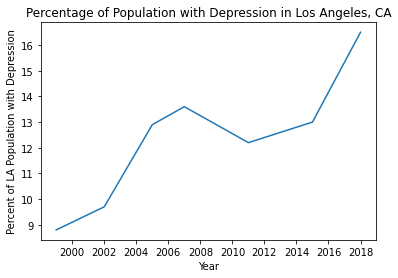

In [325]:
# After consideration, we will focus on exploring Los Angeles county specifically .. 
la_url = 'https://raw.githubusercontent.com/jennynunez/032-DATA/main/la_demos_cleaned.csv'
df4 = pd.read_csv(la_url, index_col=0)
# We want to drop the index name because it is not useful
df4.index.name = None
# We will now reset the index column and removing unhelpful values
df4 = df4.T.reset_index().reset_index(drop=True)
# Renaming columns that have incorrect labels
df4 = df4.rename(columns={'index': 'year'})
# Removing percentage symbol throughout the DataFrame
df4 = df4.replace('%', '', regex=True)
# Convering DataFrame to numeric values
df4 = df4.apply(pd.to_numeric)
# Properly formatting years in datetime format so Seaborn doesn't convert the years to floats
df4['year'] = pd.to_datetime(df4.year.astype(str), format="%Y")
# Renaming 'LA Overall' column to be more descriptive about what the data is telling us
overall = df4.rename(columns={'LA Overall': 'population_depression_diagnosis_percent'})
# The overall LA county data is in the first few rows so we are using a subset of the data
overall = overall.iloc[:, 0:2]
# Graphing Percentage of Population with Depression in Los Angeles, CA using Seaborn lineplot and renaming axes to be more descriptive
sns.lineplot(data=overall, x='year', y='population_depression_diagnosis_percent').set(title="Percentage of Population with Depression in Los Angeles, CA", xlabel="Year", ylabel="Percent of LA Population with Depression")

The figure above is a line chart displaying the percent of the population in Los Angeles, CA that has a diagnosis of depression in a particular year. Althhough there was a brief decline in the percent of the LA population diagnosed with depression between 2007 and 2011, the overall trend has been a significant overall increase from about 9% of the population in 2000 to over 16% of the population in 2018.